In [19]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer 

In [20]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_glcm_z = pd.read_csv(os.path.join(folder_path, "features_glcm_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_glcm_mm = pd.read_csv(os.path.join(folder_path, "features_glcm_all_minmax.csv"))

In [21]:
df_glcm_z

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,filename,label
0,-0.117970,-0.265037,0.573895,1.615441,0.261439,1.623821,callo_1.png,smaller
1,-0.689035,-0.862073,1.111661,1.826963,-0.049338,1.866511,callo_10.png,smaller
2,0.723027,0.707483,-0.528180,-0.424014,-0.919636,-0.447924,callo_100.png,smaller
3,0.125226,0.337029,-0.517080,-0.809188,-0.678186,-0.788491,callo_101.png,smaller
4,1.304987,1.643435,-1.718236,-0.716244,-1.826587,-0.709481,callo_102.png,smaller
...,...,...,...,...,...,...,...,...
532,-0.277401,-0.521728,0.875899,0.606081,0.546989,0.543134,callo_95.png,higher
533,0.083434,-0.523298,1.088512,-0.232107,0.255967,-0.272234,callo_96.png,higher
534,-0.097836,-0.273793,0.451454,-0.024781,0.459498,-0.076473,callo_97.png,higher
535,-0.449770,-1.003507,1.655792,2.974858,0.716253,3.251952,callo_98.png,higher


In [22]:
df_glcm_z.isnull().sum()

contrast         0
dissimilarity    0
homogeneity      0
energy           0
correlation      0
ASM              0
filename         0
label            0
dtype: int64

In [23]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_glcm_z_cl= df_glcm_z.drop(columns=['filename', 'label'])

Se realiza clustering con k-means. Para averiguar cual va a ser el mejor valor de k o clusters se aplica el método
del "codo". También se simularán con diferentes números de clusteres la silueta.

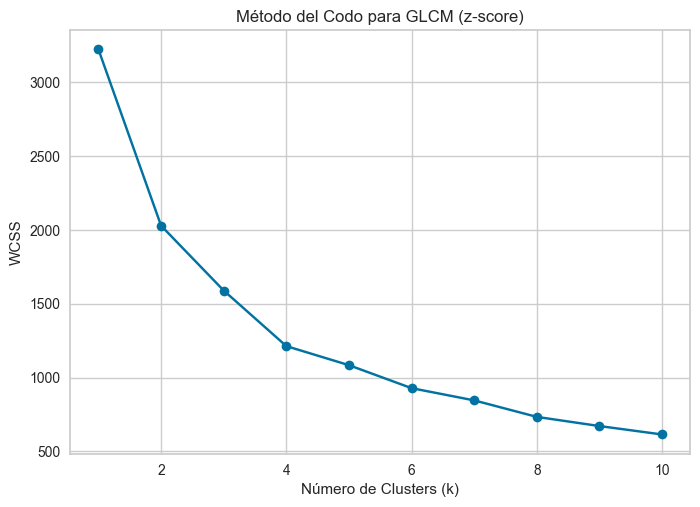

In [24]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_glcm_z_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (z-score)')
plt.grid(True)
plt.show()

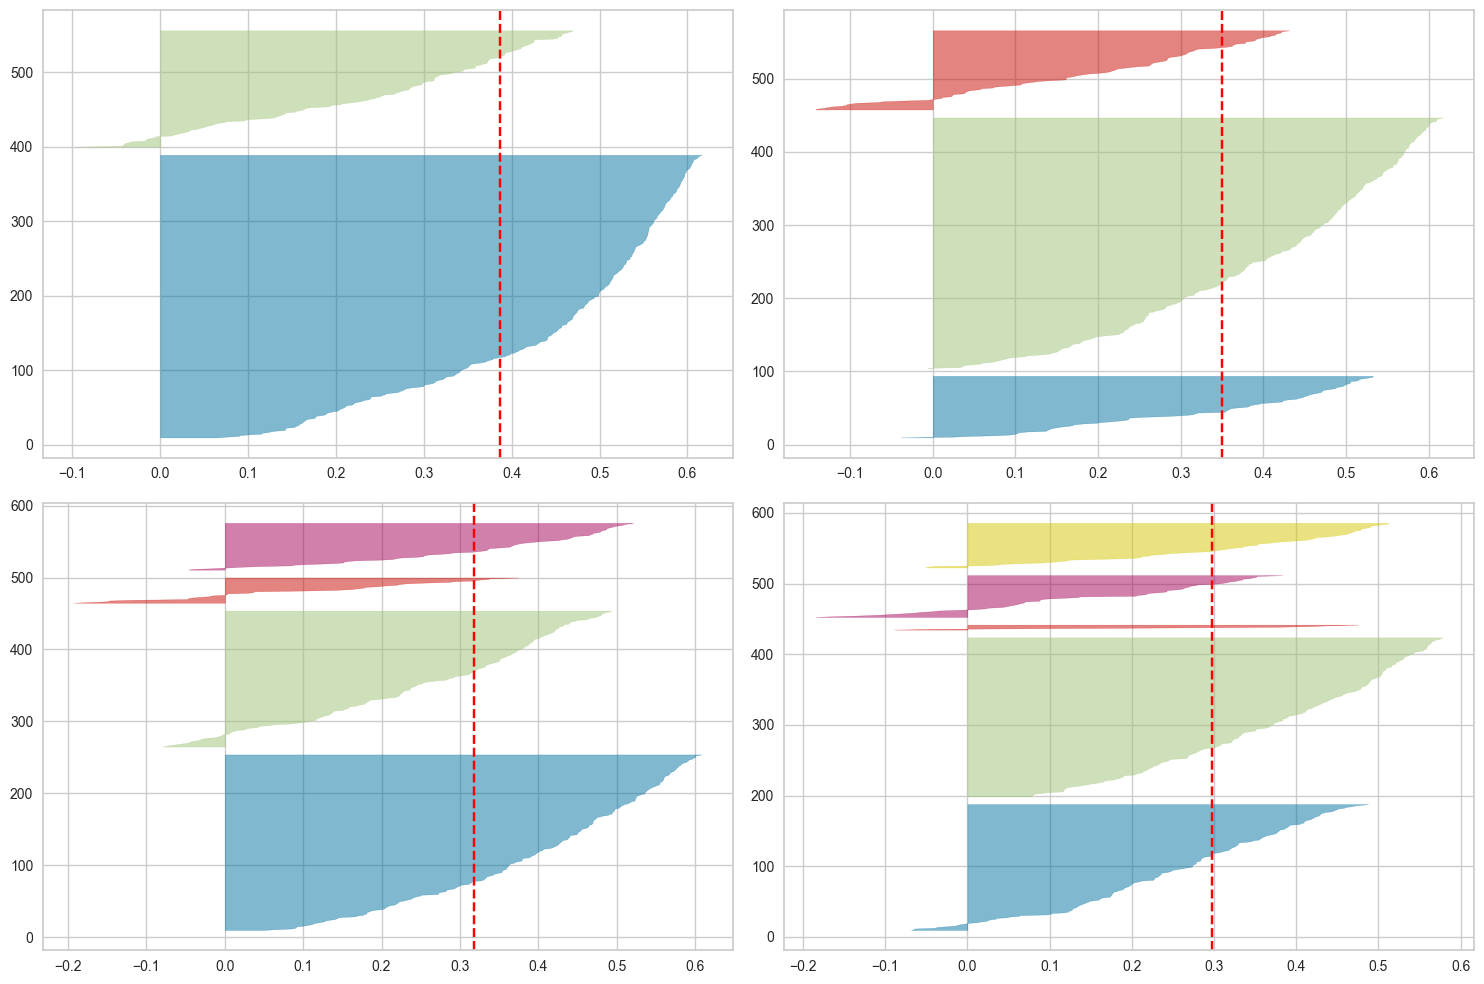

In [25]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_glcm_z_cl)  

plt.tight_layout()
plt.show()

Aunque se obtiene mejor valor de silueta con dos clusteres, pero se van a probar 3 teniendo en cuenta ambos criterios

In [26]:
#Modelo k-means
cluster_glcm_z= KMeans(init='k-means++',n_clusters=3,random_state=42)
cluster_glcm_z.fit(df_glcm_z_cl)   

KMeans(n_clusters=3, random_state=42)

In [27]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_glcm_z['Cluster'] = cluster_glcm_z.labels_
pd.crosstab(df_glcm_z['Cluster'], df_glcm_z['label'])

label,higher,smaller
Cluster,,
0,168,64
1,100,166
2,0,39


In [28]:
silhouette_avg_glcm_z = silhouette_score(df_glcm_z_cl, cluster_glcm_z.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_glcm_z}')

Índice de silueta promedio: 0.3001238969671003


Ahora se realiza lo mismo pero con la normalización min-max

In [29]:
df_glcm_mm

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,filename,label
0,0.180035,0.153752,0.849470,0.637627,0.834112,0.524976,callo_1.png,smaller
1,0.108787,0.082758,0.916683,0.660920,0.789212,0.551927,callo_10.png,smaller
2,0.284960,0.269394,0.711725,0.413043,0.663472,0.294907,callo_100.png,smaller
3,0.210377,0.225344,0.713113,0.370628,0.698357,0.257087,callo_101.png,smaller
4,0.357567,0.380689,0.562984,0.380863,0.532437,0.265861,callo_102.png,smaller
...,...,...,...,...,...,...,...,...
532,0.160144,0.123228,0.887216,0.526477,0.875368,0.404965,callo_95.png,higher
533,0.205163,0.123042,0.913790,0.434176,0.833322,0.314418,callo_96.png,higher
534,0.182547,0.152710,0.834166,0.457007,0.862728,0.336157,callo_97.png,higher
535,0.138639,0.065940,0.984693,0.787326,0.899824,0.705780,callo_98.png,higher


In [30]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_glcm_mm_cl= df_glcm_mm.drop(columns=['filename', 'label'])

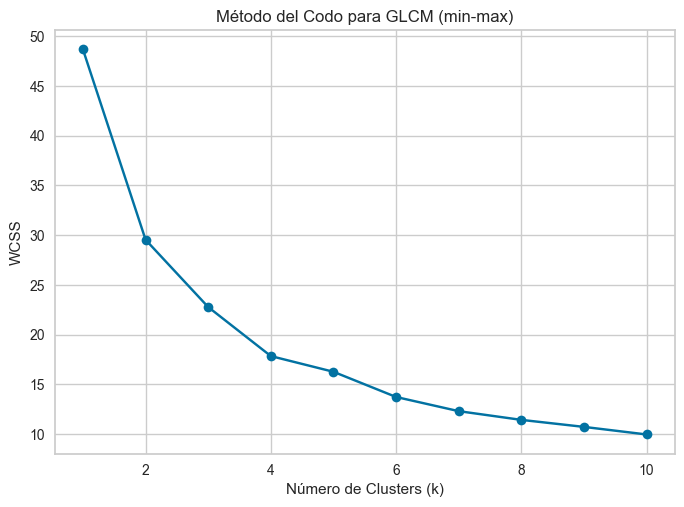

In [31]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_glcm_mm_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (min-max)')
plt.grid(True)
plt.show()

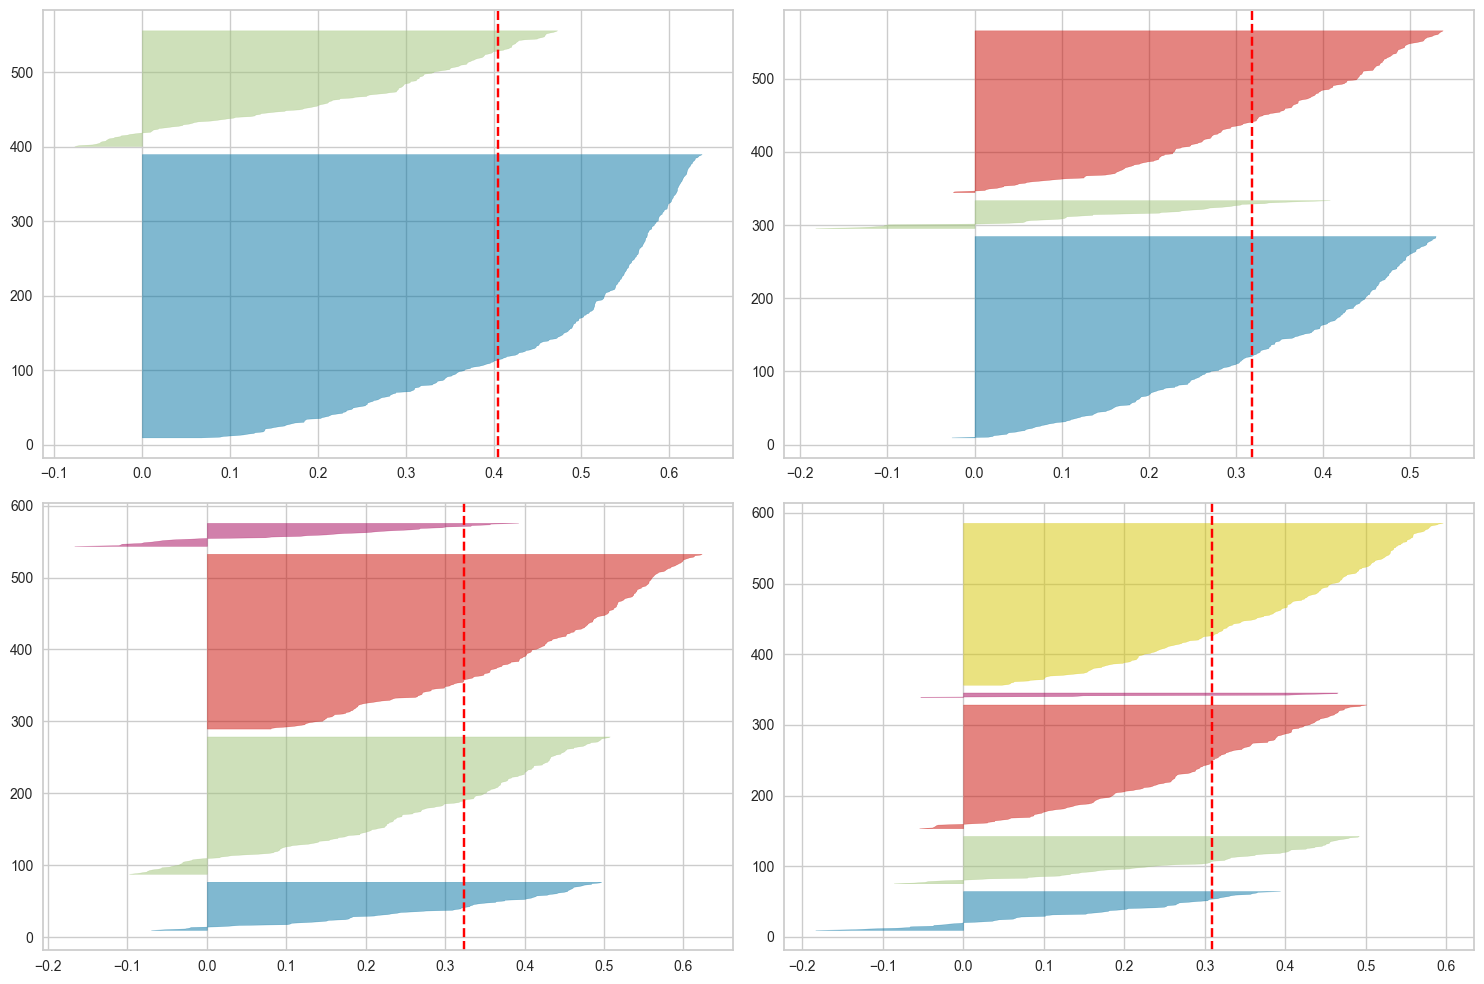

In [32]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_glcm_mm_cl)  # Usa tu dataframe ya escalado o transformado

plt.tight_layout()
plt.show()

In [33]:
#Modelo k-means
cluster_glcm_mm= KMeans(init='k-means++',n_clusters=3,random_state=42)
cluster_glcm_mm.fit(df_glcm_mm_cl) 

KMeans(n_clusters=3, random_state=42)

In [34]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_glcm_mm['Cluster'] = cluster_glcm_mm.labels_
pd.crosstab(df_glcm_mm['Cluster'], df_glcm_mm['label'])

label,higher,smaller
Cluster,,
0,201,75
1,0,39
2,67,155


In [35]:
silhouette_avg_glcm_mm = silhouette_score(df_glcm_mm_cl, cluster_glcm_mm.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_glcm_mm}')

Índice de silueta promedio: 0.3184996942363979
